# STC Lab 4C : Linear Logistic Regression and Analysis
<strong>Kaustubh Venkatesh<strong><br>
UID : 2018120033<br>
Roll No. : 36<br>
Date : 05-09-2020

In [2]:
#Importing important libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
#Part C - Logistic Regression Analysis
#Importing the dataset
ds = load_breast_cancer()
cancer = pd.DataFrame(ds.data, columns = ds.feature_names)

#Defining the target values
y = pd.DataFrame(ds.target, columns = ['class'])

In [4]:
#Summary of the dataset
cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
#Dimensions of the dataset
cancer.shape

(569, 30)

In [11]:
#Splitting the data into training and testing datasets
X_train,X_test,y_train,y_test=train_test_split(cancer,y,test_size=0.2,random_state=0)

In [12]:
#Creating the Logistic Regression model
logMod = LogisticRegression()

#Training the model
logMod.fit(X_train, y_train)

C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kaustubh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
#Accuracy of the model
score = 100 * logMod.score(X_test, y_test)
print("Prediction Score : {:.3f} %".format(score))

Prediction Score : 95.614 %


In [14]:
#Predicting values using the model
y_pred = pd.DataFrame(logMod.predict(X_test))
print("Predicted Values : ", np.array(y_pred[0]))

Predicted Values :  [0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]


In [15]:
#Evaluating the performance of the model
confusion_matrix(y_pred, y_test)

array([[46,  4],
       [ 1, 63]], dtype=int64)

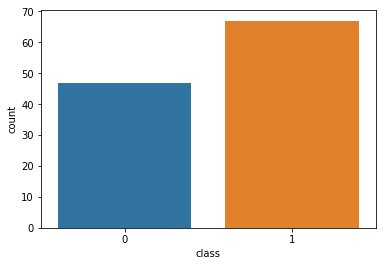

In [16]:
#Plotting the predicted values
sns.countplot(y_test['class'])

<style>
div.blue { background-color:#e6f0ff; border-radius: 5px; padding: 20px;}
</style>
<div class = "blue">
<strong>Conclusion : </strong>
<br/>
From the experiment conducted, it can be concluded that logistic and multi-nomial regression is used to model the probability of a certain class or event existing such as pass/fail, win/lose etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one. Python has inbuilt functions which allows us to generate a general linear regression model using the data provided to it,

</div>